In [33]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt 1
from scipy.interpolate import make_interp_spline
from sklearn import datasets
import numpy as np
import pandas as pd
import math

In [34]:
def lin_classifier(w, b, x):
    res = np.dot(w, x) + b
    if res > 0:
        return 1
    else:
        return -1

In [118]:
def perceptron(data, labels):
    gen = np.random.default_rng()
    w, b = np.zeros(data.shape[1]) , 0
    misclassified = False
    count = 0
    
    while True:
        misclassified = False
        for i in range(data.shape[0]):
            rand_index = gen.choice(data.shape[0])
            x_i = data[rand_index]
            y_i = labels[rand_index]

            pred = lin_classifier(w, b, x_i)

            if pred != y_i:
                w += y_i * x_i
                b += y_i
                misclassified = True
                count += 1
        if not misclassified:
            break

    return w, b, count

In [119]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
new_x = x[:, [1, 3]]
mask = (y == 0) | (y == 1)
X_filtered = new_x[mask]
y_filtered = y[mask]

# Recode 0 as -1
y_filtered = np.where(y_filtered == 0, -1, 1)

In [120]:
def predict(X, b, w):
    # Compute the decision function
    decision_values = np.dot(X, w) + b
    # Apply threshold (0) to get predictions
    predictions = np.where(decision_values >= 0, 1, -1)
    return predictions

In [133]:
w1, b1, count = perceptron(X_filtered, y_filtered)
print(w1)
print(b1)

[-2.1  9.5]
1


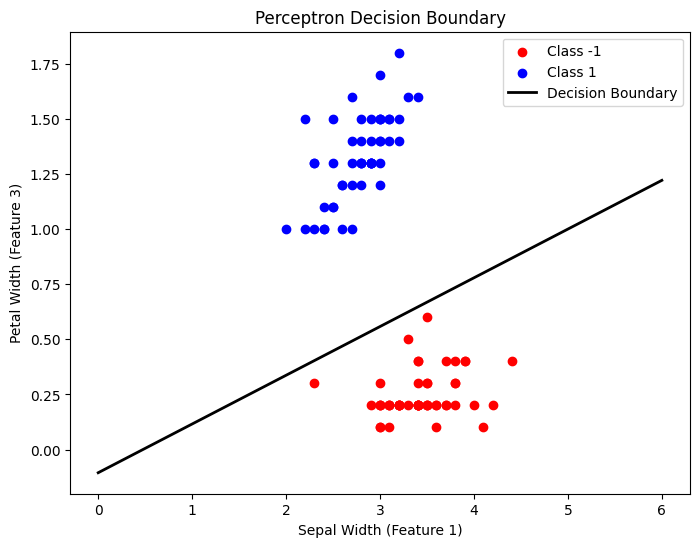

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(X_filtered[y_filtered == -1][:, 0], X_filtered[y_filtered == -1][:, 1], color='red', label='Class -1')
plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], color='blue', label='Class 1')

# Create a grid to plot the decision boundary
x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
y_min, y_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

x1_values = np.array([0, 6])  # Choosing arbitrary x1 values for the line

# Solve for x2 (feature 2) using the decision boundary equation
x2_values = -(w1[0] * x1_values + b1) / w1[1]

# Plot decision boundary
plt.plot(x1_values, x2_values, color='black', linewidth=2, label="Decision Boundary")

plt.xlabel('Sepal Width (Feature 1)')
plt.ylabel('Petal Width (Feature 3)')
plt.title('Perceptron Decision Boundary')
plt.legend()

[7, 6, 8, 13, 11, 13, 6, 9, 10, 6, 13, 13, 11, 17, 2, 2, 4, 15, 19, 4]


Text(0.5, 1.0, 'Perceptron Algorithm Updates')

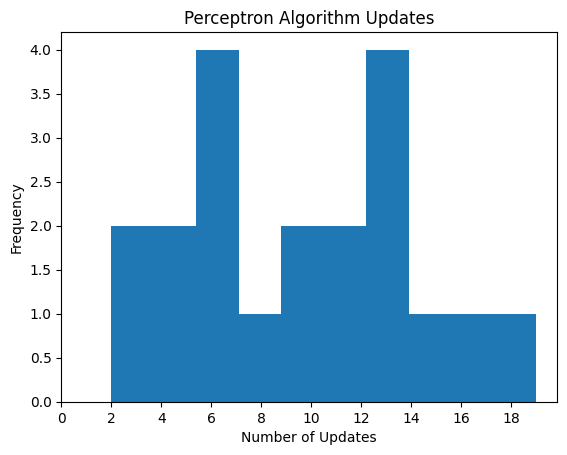

In [136]:
update_list = []
for i in range(20):
    w2, b2, update_count = perceptron(X_filtered, y_filtered)
    update_list.append(update_count)
print(update_list)
plt.hist(update_list)
plt.xticks(np.arange(start=0, stop=max(update_list)+1, step=2))
plt.xlabel("Number of Updates")
plt.ylabel("Frequency")
plt.title("Perceptron Algorithm Updates")




# Problem 8

In [146]:
x_even = x[:, [0,2]]
mask = (y == 1) | (y == 2)
X_filtered = x_even[mask]
y_filtered = y[mask]
svc_model = SVC(kernel='linear', C = 1e10)
svc_model.fit(X_filtered, y_filtered)
predictions = svc_model.predict(X_filtered)
print(accuracy_score(y_filtered, predictions))
acc = np.all(predictions == y_filtered)
print("Is accuracy 1.0?: ", acc)


0.95
Is accuracy 1.0?:  False


In [148]:
perceptron_8 = Perceptron()
perceptron_8.fit(X_filtered, y_filtered)
y8_pred = perceptron_8.predict(X_filtered)
accuracy_8 = accuracy_score(y_filtered, y8_pred)
print(accuracy_8)

0.8


# 8a. Because all the predictions of the SVC with a linear kernel and a high C value are not the same as their labels, we know that this data is not linearly separable.

# 8b.

In [282]:
c_values = [0.01, 0.1, 1, 10, 50, 100, 1000, 10000, 100000, 1000000]
c_dict = {}
for c in c_values:
    svc_model = SVC(kernel='linear', C=c)
    svc_model.fit(X_filtered, y_filtered)
    preds = svc_model.predict(X_filtered)
    c_score = svc_model.score(X_filtered, y_filtered)
    c_dict[c] = [c_score, svc_model.n_support_]

c_table = pd.DataFrame(c_dict).T
c_table.columns = ['training_error', 'n_support_vectors']
c_table.index.name = "c_value"
display(c_table)


,training_error,n_support_vectors
c_value,,
0.01,0.84,"[46, 46]"
0.10,0.93,"[28, 28]"
1.00,0.93,"[16, 15]"
10.00,0.95,"[9, 9]"
50.00,0.95,"[7, 7]"
100.00,0.95,"[7, 7]"
1000.00,0.95,"[7, 7]"
10000.00,0.95,"[7, 7]"
100000.00,0.94,"[7, 7]"


# 8c. Out of the ten points, C = 50 seems to be the best because it is the lowest value of C that also has the highest training error, so our tradeoff between margin and slack seems good, and we can prevent overfitting.

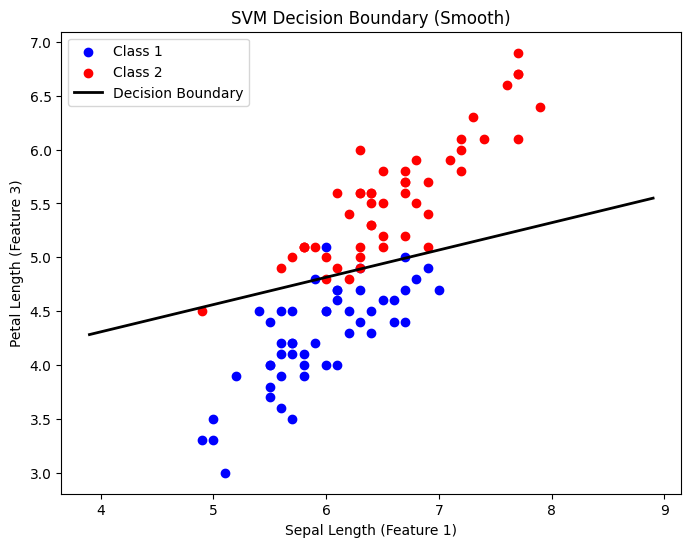

In [285]:
w = svc_model.coef_[0]
b = svc_model.intercept_[0]

x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 100)

y_vals = (-w[0] / w[1]) * x_vals - (b / w[1])

plt.figure(figsize=(8, 6))
plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_filtered[y_filtered == 2][:, 0], X_filtered[y_filtered == 2][:, 1], color='red', label='Class 2')

plt.plot(x_vals, y_vals, 'k-', linewidth=2, label="Decision Boundary")

plt.xlabel('Sepal Length (Feature 1)')
plt.ylabel('Petal Length (Feature 3)')
plt.title('SVM Decision Boundary (Smooth)')
plt.legend()
plt.show()

In [ ]:
# clf = Perceptron(max_iter=1000, tol=1e-3)
# clf.fit(X_filtered, y_filtered)

# # Create a grid to plot the decision boundary
# x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
# y_min, y_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# grid = np.c_[xx.ravel(), yy.ravel()]
# Z = clf.predict(grid)  # Get predictions for each point in the grid
# Z = Z.reshape(xx.shape)  # Reshape back to grid shape

# # Plot the data points
# plt.figure(figsize=(8, 6))
# plt.scatter(X_filtered[y_filtered == -1][:, 0], X_filtered[y_filtered == -1][:, 1], color='red', label='Class -1')
# plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], color='blue', label='Class 1')

# # Plot decision boundary using contour plot                                                                                                                                                                                                   
# plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', label="Decision Boundary")

# plt.xlabel('Sepal Width (Feature 1)')
# plt.ylabel('Petal Width (Feature 3)')
# plt.title('Perceptron Decision Boundary')
# plt.legend()
# plt.show()